In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

df = pd.read_csv('./data-p1/polls_us_election_2016.csv')

# Check for NaN values
print(df[['rawpoll_clinton', 'adjpoll_clinton', 'rawpoll_trump', 'adjpoll_trump', 'rawpoll_johnson', 'adjpoll_mcmullin']].isna().sum())

# Check for Inf values
print(np.isinf(df[['rawpoll_clinton', 'adjpoll_clinton', 'rawpoll_trump', 'adjpoll_trump', 'rawpoll_johnson', 'adjpoll_mcmullin']]).sum())

# Fill NaN values with column mean
df_cleaned = df.replace([np.inf, -np.inf], np.nan)
df_cleaned['rawpoll_clinton'].fillna(df['rawpoll_clinton'].mean(), inplace=True)
df_cleaned['adjpoll_clinton'].fillna(df['adjpoll_clinton'].mean(), inplace=True)
df_cleaned['rawpoll_trump'].fillna(df['rawpoll_trump'].mean(), inplace=True)
df_cleaned['adjpoll_trump'].fillna(df['adjpoll_trump'].mean(), inplace=True)
df_cleaned['rawpoll_johnson'].fillna(df['rawpoll_johnson'].mean(), inplace=True)
df_cleaned['adjpoll_mcmullin'].fillna(df['adjpoll_mcmullin'].mean(), inplace=True)

df.head()


rawpoll_clinton        0
adjpoll_clinton        0
rawpoll_trump          0
adjpoll_trump          0
rawpoll_johnson     1409
adjpoll_mcmullin    4178
dtype: int64
rawpoll_clinton     0
adjpoll_clinton     0
rawpoll_trump       0
adjpoll_trump       0
rawpoll_johnson     0
adjpoll_mcmullin    0
dtype: int64


,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin
0,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220.0,lv,47.00,43.00,4.00,NaN,45.20163,41.72430,4.626221,NaN
1,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574.0,lv,38.03,35.69,5.46,NaN,43.34557,41.21439,5.175792,NaN
2,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195.0,lv,42.00,39.00,6.00,NaN,42.02638,38.81620,6.844734,NaN
3,U.S.,2016-11-04,2016-11-07,YouGov,B,3677.0,lv,45.00,41.00,5.00,NaN,45.65676,40.92004,6.069454,NaN
4,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639.0,rv,47.00,43.00,3.00,NaN,46.84089,42.33184,3.726098,NaN


In [25]:
df.describe

<bound method NDFrame.describe of           state   startdate     enddate                  pollster grade  \
0          U.S.  2016-11-03  2016-11-06  ABC News/Washington Post    A+   
1          U.S.  2016-11-01  2016-11-07   Google Consumer Surveys     B   
2          U.S.  2016-11-02  2016-11-06                     Ipsos    A-   
3          U.S.  2016-11-04  2016-11-07                    YouGov     B   
4          U.S.  2016-11-03  2016-11-06          Gravis Marketing    B-   
...         ...         ...         ...                       ...   ...   
4203   Virginia  2016-09-16  2016-09-22                     Ipsos    A-   
4204  Wisconsin  2016-08-04  2016-08-07      Marquette University     A   
4205       Utah  2016-11-01  2016-11-07   Google Consumer Surveys     B   
4206     Oregon  2016-10-21  2016-11-02                     Ipsos    A-   
4207   Michigan  2016-01-23  2016-01-26                  EPIC-MRA    A-   

      samplesize population  rawpoll_clinton  rawpoll_trump  rawp

In [26]:
def compare_polls(df, candidate_raw, candidate_adj, candidate_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=candidate_raw, y=candidate_adj)
    plt.title(f'Raw vs Adjusted Polls for {candidate_name}')
    plt.xlabel(f'Raw Poll {candidate_name}')
    plt.ylabel(f'Adjusted Poll {candidate_name}')
    plt.plot([df[candidate_raw].min(), df[candidate_raw].max()], [df[candidate_raw].min(), df[candidate_raw].max()], 'r--')  # Line y=x for reference
    plt.show()

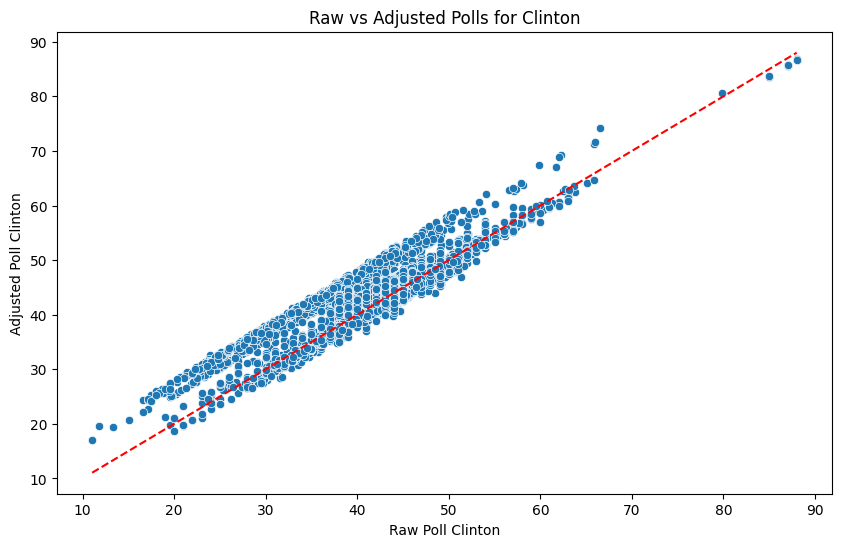

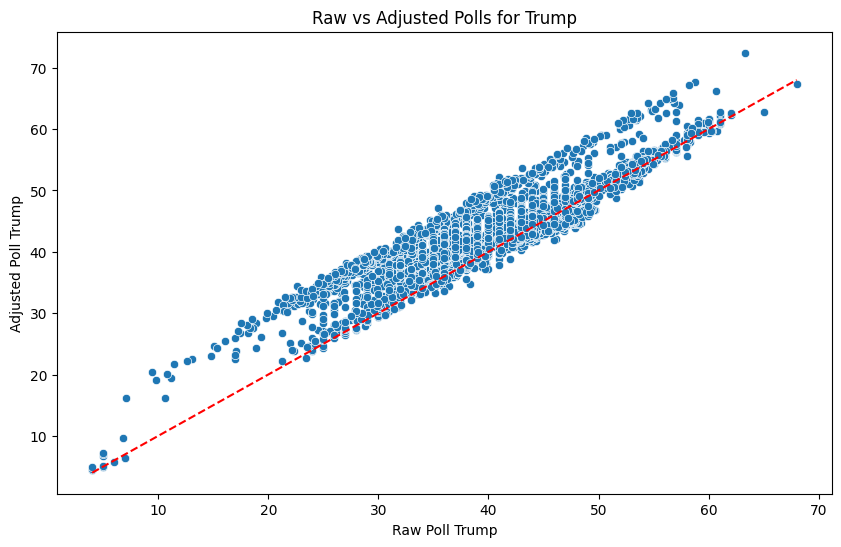

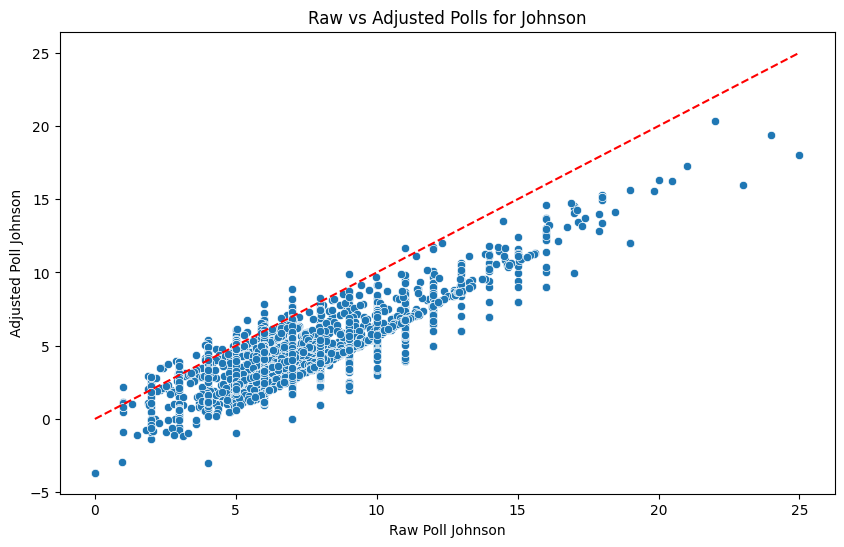

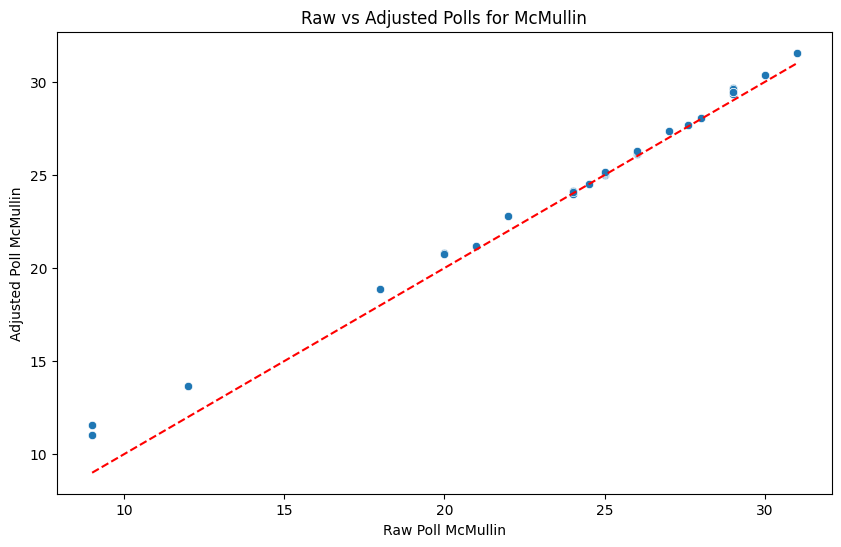

In [27]:
compare_polls(df, 'rawpoll_clinton', 'adjpoll_clinton', 'Clinton')
compare_polls(df, 'rawpoll_trump', 'adjpoll_trump', 'Trump')
compare_polls(df, 'rawpoll_johnson', 'adjpoll_johnson', 'Johnson')
compare_polls(df, 'rawpoll_mcmullin', 'adjpoll_mcmullin', 'McMullin')

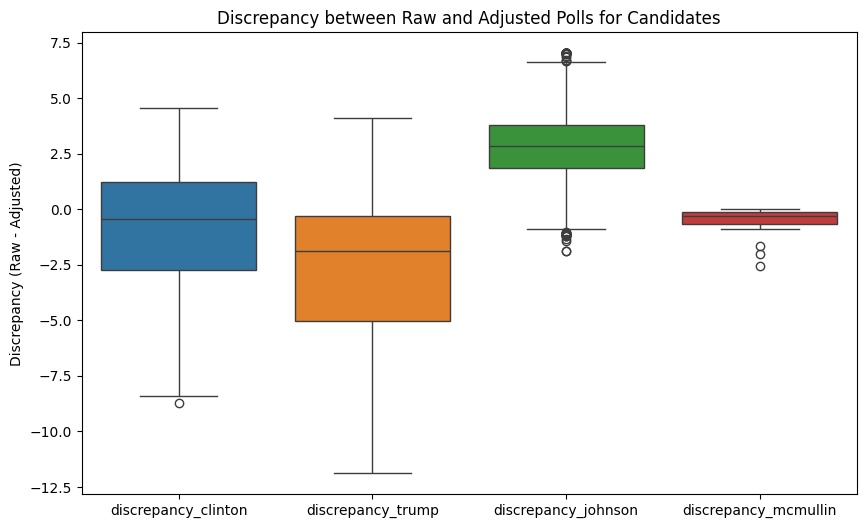

In [28]:
df['discrepancy_clinton'] = df['rawpoll_clinton'] - df['adjpoll_clinton']
df['discrepancy_trump'] = df['rawpoll_trump'] - df['adjpoll_trump']
df['discrepancy_johnson'] = df['rawpoll_johnson'] - df['adjpoll_johnson']
df['discrepancy_mcmullin'] = df['rawpoll_mcmullin'] - df['adjpoll_mcmullin']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['discrepancy_clinton', 'discrepancy_trump', 'discrepancy_johnson', 'discrepancy_mcmullin']])
plt.title('Discrepancy between Raw and Adjusted Polls for Candidates')
plt.ylabel('Discrepancy (Raw - Adjusted)')
plt.show()

<Figure size 1400x800 with 0 Axes>

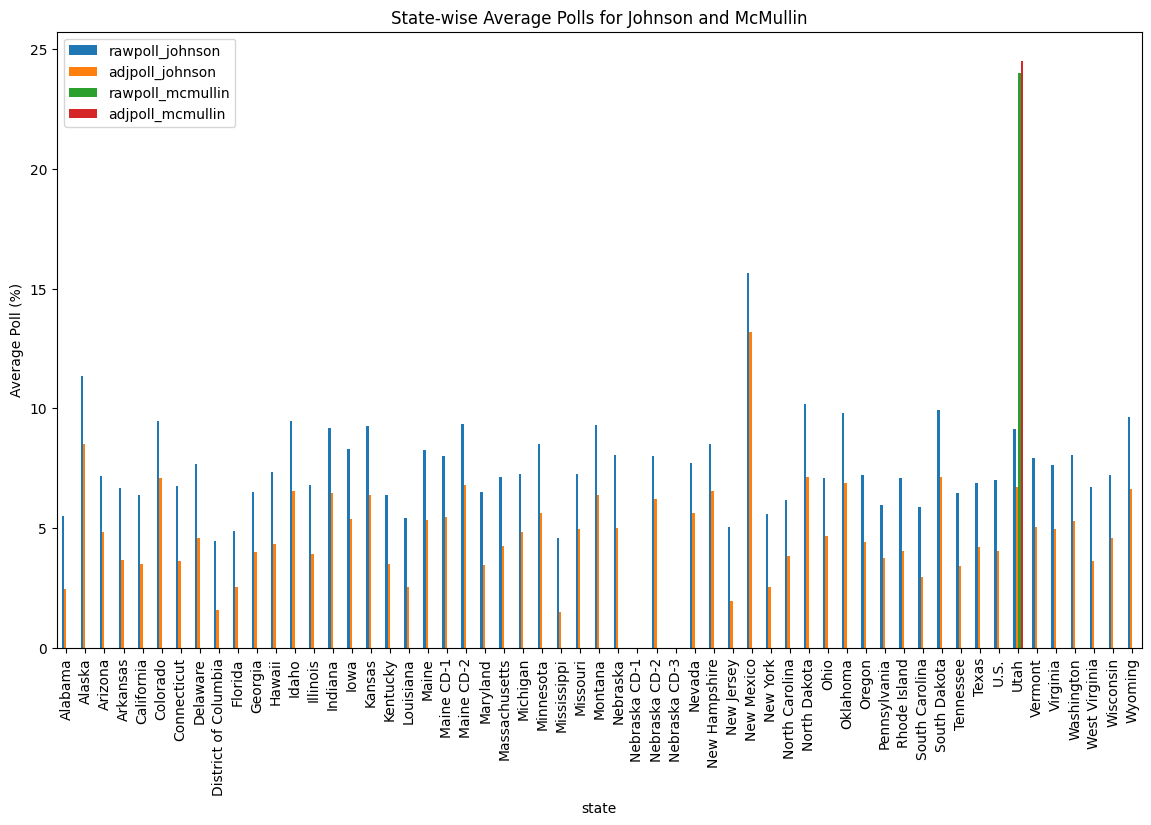

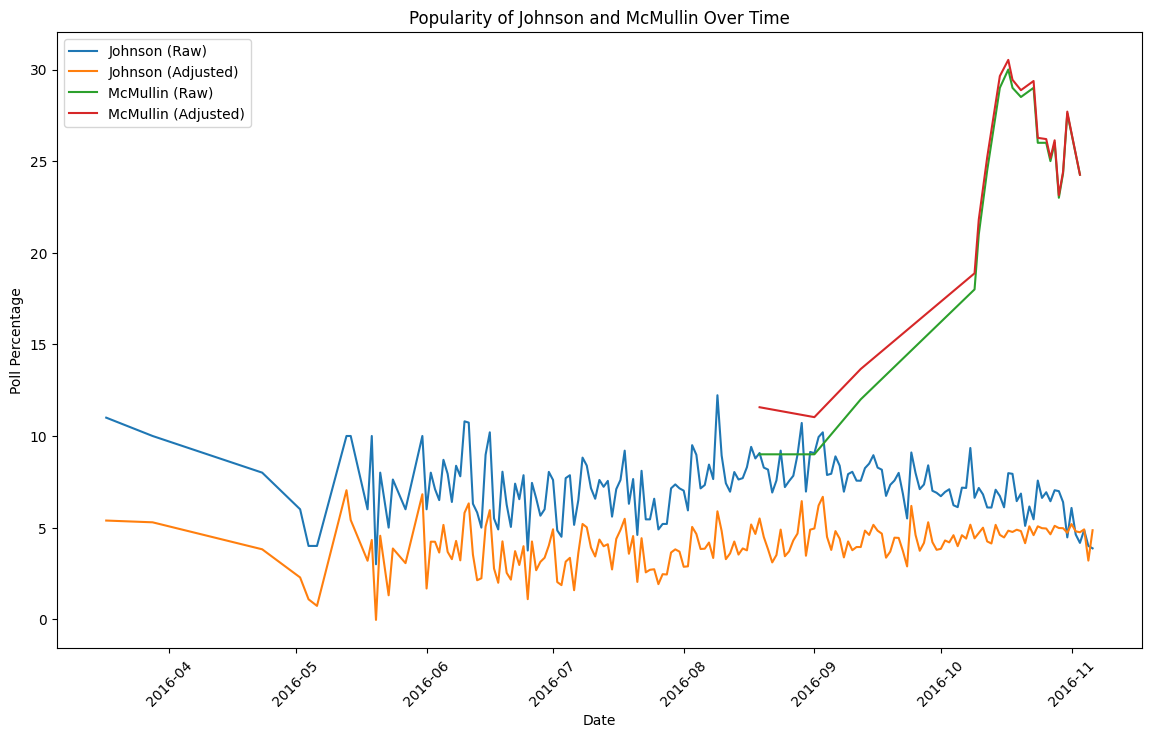

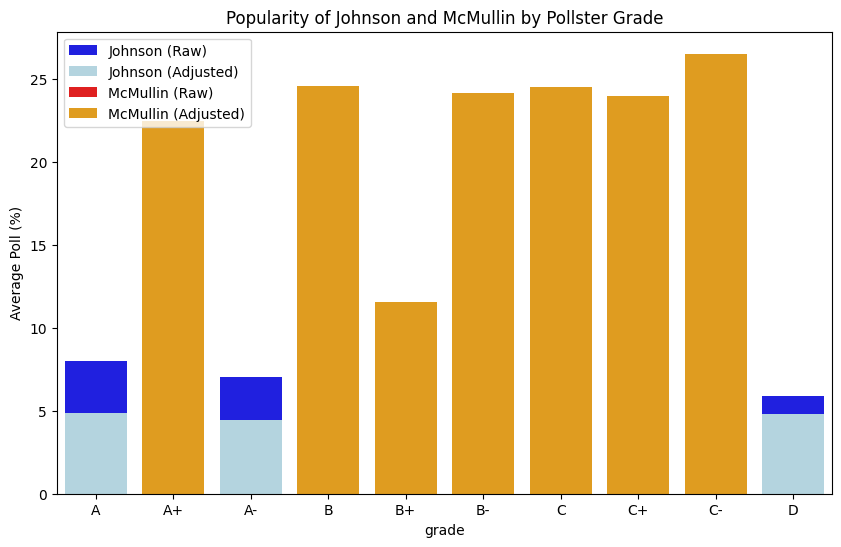

Johnson Poll Correlation with Sample Size:
                 samplesize  rawpoll_johnson  adjpoll_johnson
samplesize         1.000000        -0.013698        -0.052645
rawpoll_johnson   -0.013698         1.000000         0.839880
adjpoll_johnson   -0.052645         0.839880         1.000000
McMullin Poll Correlation with Sample Size:
                  samplesize  rawpoll_mcmullin  adjpoll_mcmullin
samplesize          1.000000          0.182045          0.159965
rawpoll_mcmullin    0.182045          1.000000          0.997427
adjpoll_mcmullin    0.159965          0.997427          1.000000


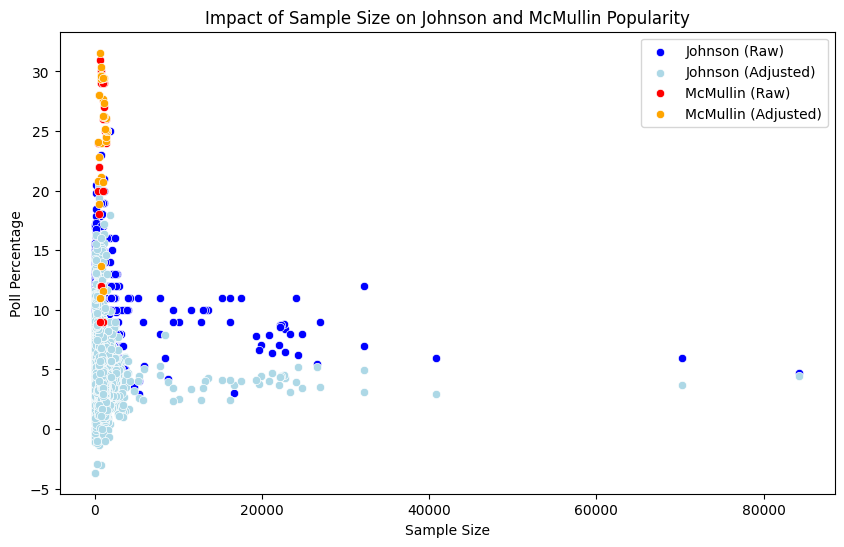

In [38]:
# State-wise popularity for Johnson and McMullin
statewise_popularity = df.groupby('state')[['rawpoll_johnson', 'rawpoll_mcmullin', 'adjpoll_johnson', 'adjpoll_mcmullin']].mean().reset_index()


plt.figure(figsize=(14, 8))
statewise_popularity.plot(x='state', y=['rawpoll_johnson', 'adjpoll_johnson', 'rawpoll_mcmullin', 'adjpoll_mcmullin'], kind='bar', figsize=(14, 8))
plt.title('State-wise Average Polls for Johnson and McMullin')
plt.ylabel('Average Poll (%)')
plt.xticks(rotation=90)
plt.show()


df['startdate'] = pd.to_datetime(df['startdate'])
df['enddate'] = pd.to_datetime(df['enddate'])


datewise_popularity = df.groupby('startdate')[['rawpoll_johnson', 'adjpoll_johnson', 'rawpoll_mcmullin', 'adjpoll_mcmullin']].mean().reset_index()

# Plot their popularity over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=datewise_popularity, x='startdate', y='rawpoll_johnson', label='Johnson (Raw)')
sns.lineplot(data=datewise_popularity, x='startdate', y='adjpoll_johnson', label='Johnson (Adjusted)')
sns.lineplot(data=datewise_popularity, x='startdate', y='rawpoll_mcmullin', label='McMullin (Raw)')
sns.lineplot(data=datewise_popularity, x='startdate', y='adjpoll_mcmullin', label='McMullin (Adjusted)')
plt.title('Popularity of Johnson and McMullin Over Time')
plt.ylabel('Poll Percentage')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

# Pollster Grade Analysis
pollster_grade_popularity = df.groupby('grade')[['rawpoll_johnson', 'adjpoll_johnson', 'rawpoll_mcmullin', 'adjpoll_mcmullin']].mean().reset_index()

# Plot Johnson and McMullin's popularity across pollster grades
plt.figure(figsize=(10, 6))
sns.barplot(data=pollster_grade_popularity, x='grade', y='rawpoll_johnson', color='blue', label='Johnson (Raw)')
sns.barplot(data=pollster_grade_popularity, x='grade', y='adjpoll_johnson', color='lightblue', label='Johnson (Adjusted)')
sns.barplot(data=pollster_grade_popularity, x='grade', y='rawpoll_mcmullin', color='red', label='McMullin (Raw)')
sns.barplot(data=pollster_grade_popularity, x='grade', y='adjpoll_mcmullin', color='orange', label='McMullin (Adjusted)')
plt.title('Popularity of Johnson and McMullin by Pollster Grade')
plt.ylabel('Average Poll (%)')
plt.show()

# Sample Size Impact
sample_size_popularity = df[['samplesize', 'rawpoll_johnson', 'adjpoll_johnson', 'rawpoll_mcmullin', 'adjpoll_mcmullin']].copy()

# Correlation between sample size and poll percentages
correlation_johnson_sample = sample_size_popularity[['samplesize', 'rawpoll_johnson', 'adjpoll_johnson']].corr()
correlation_mcmullin_sample = sample_size_popularity[['samplesize', 'rawpoll_mcmullin', 'adjpoll_mcmullin']].corr()

print("Johnson Poll Correlation with Sample Size:")
print(correlation_johnson_sample)

print("McMullin Poll Correlation with Sample Size:")
print(correlation_mcmullin_sample)

# Scatterplot to visually inspect sample size impact
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='samplesize', y='rawpoll_johnson', label='Johnson (Raw)', color='blue')
sns.scatterplot(data=df, x='samplesize', y='adjpoll_johnson', label='Johnson (Adjusted)', color='lightblue')
sns.scatterplot(data=df, x='samplesize', y='rawpoll_mcmullin', label='McMullin (Raw)', color='red')
sns.scatterplot(data=df, x='samplesize', y='adjpoll_mcmullin', label='McMullin (Adjusted)', color='orange')
plt.title('Impact of Sample Size on Johnson and McMullin Popularity')
plt.xlabel('Sample Size')
plt.ylabel('Poll Percentage')
plt.show()

# Clustering

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA

In [36]:
poll_data = df[['samplesize', 'rawpoll_clinton', 'adjpoll_clinton', 'rawpoll_trump', 'adjpoll_trump',
                'rawpoll_johnson', 'adjpoll_johnson', 'rawpoll_mcmullin', 'adjpoll_mcmullin']].dropna()

scaler = StandardScaler()
poll_data_scaled = scaler.fit_transform(poll_data)

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
poll_data['kmeans_cluster'] = kmeans.fit_predict(poll_data_scaled)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=4)
poll_data['agglo_cluster'] = agglo.fit_predict(poll_data_scaled)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
poll_data['dbscan_cluster'] = dbscan.fit_predict(poll_data_scaled)

/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


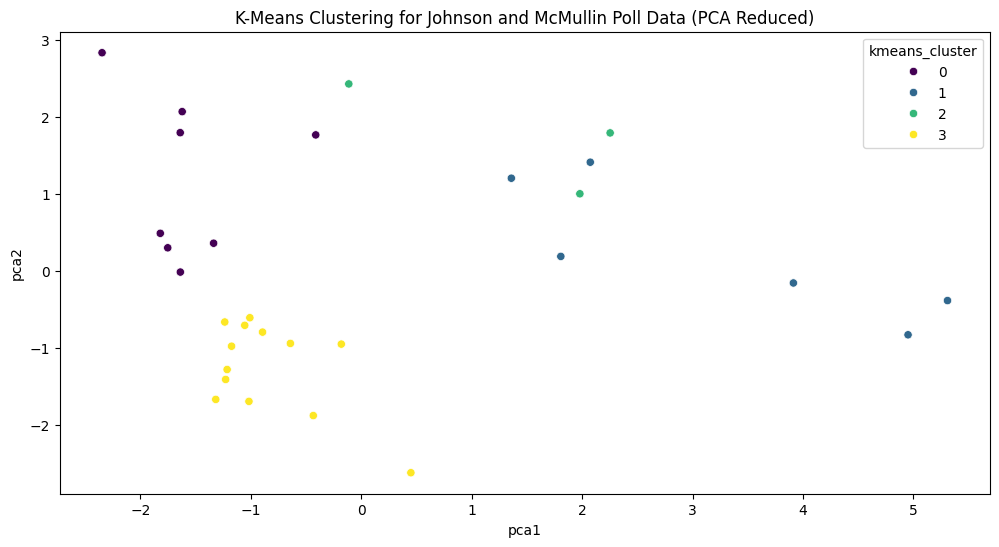

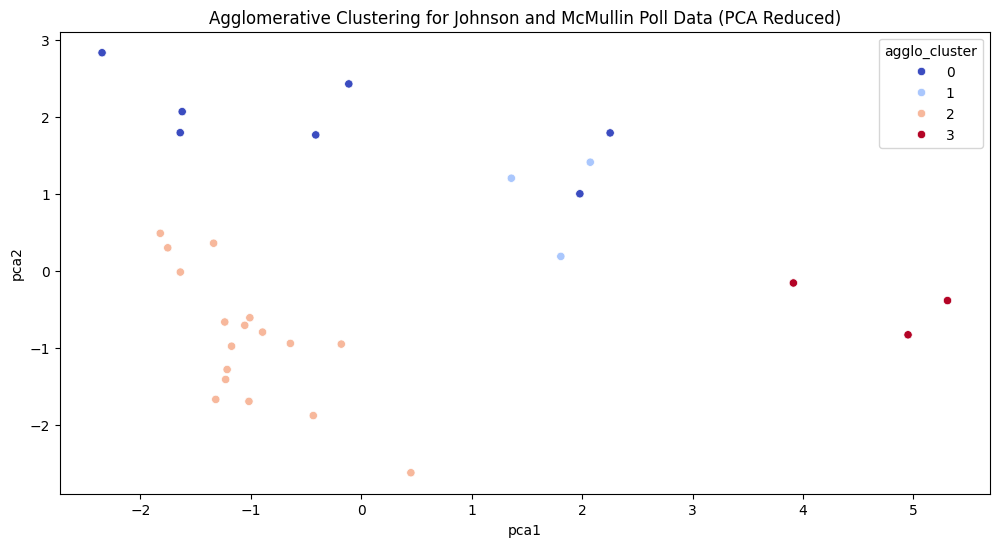

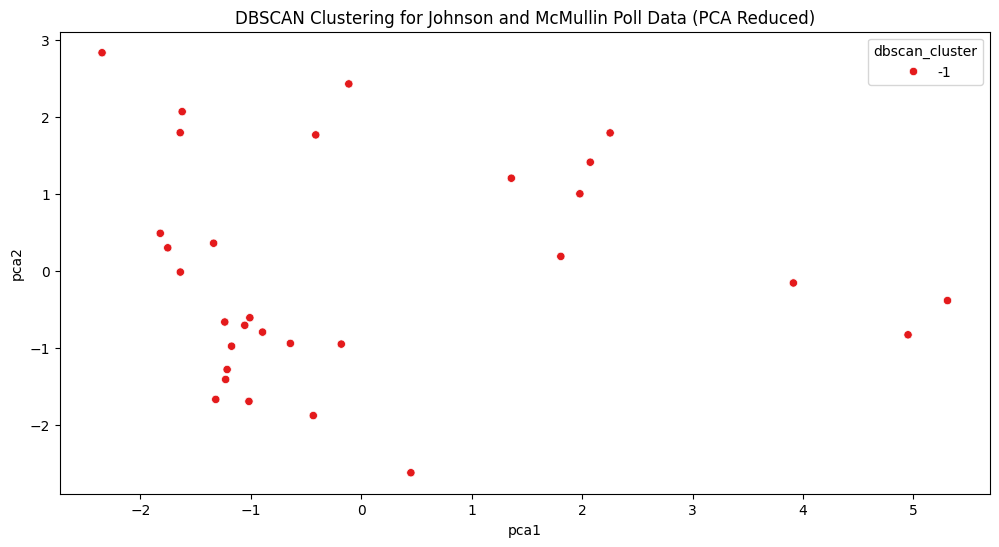

K-Means Cluster Counts:
kmeans_cluster
3    13
0     8
1     6
2     3
Name: count, dtype: int64
Agglomerative Cluster Counts:
agglo_cluster
2    17
0     7
1     3
3     3
Name: count, dtype: int64
DBSCAN Cluster Counts (note that -1 represents outliers):
dbscan_cluster
-1    30
Name: count, dtype: int64


In [37]:
# Visualize the Clusters using PCA
pca = PCA(n_components=2)
poll_data_pca = pca.fit_transform(poll_data_scaled)
poll_data['pca1'] = poll_data_pca[:, 0]
poll_data['pca2'] = poll_data_pca[:, 1]

# Plot the K-Means clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pca1', y='pca2', hue='kmeans_cluster', data=poll_data, palette='viridis')
plt.title('K-Means Clustering for Johnson and McMullin Poll Data (PCA Reduced)')
plt.show()

# Plot the Agglomerative clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pca1', y='pca2', hue='agglo_cluster', data=poll_data, palette='coolwarm')
plt.title('Agglomerative Clustering for Johnson and McMullin Poll Data (PCA Reduced)')
plt.show()

# Plot the DBSCAN clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pca1', y='pca2', hue='dbscan_cluster', data=poll_data, palette='Set1')
plt.title('DBSCAN Clustering for Johnson and McMullin Poll Data (PCA Reduced)')
plt.show()

# Optional: Examine the cluster sizes and interpret results
print("K-Means Cluster Counts:")
print(poll_data['kmeans_cluster'].value_counts())

print("Agglomerative Cluster Counts:")
print(poll_data['agglo_cluster'].value_counts())

print("DBSCAN Cluster Counts (note that -1 represents outliers):")
print(poll_data['dbscan_cluster'].value_counts())

Which 